# Assignment 1: Pandas & Seaborn
## [Scientific Computing with Python](https://scicompy.yoavram.com/)


In [1]:
# professor

%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import numpy as np
import urllib.request
import zipfile
import os.path
from datetime import datetime
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('muted')

# General instructions

1. When instructed to implement a function, use the given function names and parameters lists; failure to do so may cause test functions to fail during grading.
1. When instructed to generate a plot, make sure that the plot is clear, that axes are propely labeled, and that the notebook is saved with the plot inline, so that the grader can see the plot without running the code. Make sure that you re-generate the plot if you changed the code!
1. Code lines with a triple comment `###` should not be removed or modified, they are used for automatic grading.
1. Note that there are 2 exercises and the last cell in the notebook says **end of assignment**; if you are missing anything please download the origianl file from the course website.
1. This exercise doesn't put much emphasis on efficieny or runtime. *But*, your code should still run within a reasonable time (a few minutes) and you should use idioms learned in class, e.g. array opreations, wherever possible to "lose your loops".
1. Questions regarding the exercises should be posted to the course forum at the designated group (i.e. "assignment1"). You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. Intructions for submitting the exercise are on the [course website](https://scicompy.yoavram.com/assignments).

# Exercise 1

In this question we will look for a relation between body mass of an adult and the body mass at birth weight in the animal kingdom.

For this analysis we will load the [AnAge](http://genomics.senescence.info/download.html#anage) dataset that we used in [lecture 1](../notebooks/pandas-seaborn.ipynb).

Get the zip file containing the data, extract it and read the data to a `DataFrame`. We are interested in the `Litter/Clutch size` and `Birth weight (g)` columns.

In [2]:
###
url = 'http://genomics.senescence.info/species/dataset.zip'
fname = '../data/anage_dataset.zip'
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

Data file exists: True


In [3]:
###
with zipfile.ZipFile(fname) as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f)

If you examined the data you might have noticed that some rows have a `NaN` value in our columns of interest. 
We need to remove these rows from the data.
You can use `np.isnan`, `np.isfinite` or any other method you'd like.

In [4]:
print(data.shape)
cols = ['Body mass (g)','Birth weight (g)']
data = data.dropna(subset=cols)
print(data.shape)

(4219, 31)
(437, 31)


In [5]:
# professor
assert not np.isnan(data['Body mass (g)']).any() ###
assert not np.isnan(data['Birth weight (g)']).any() ###

We are looking for a possible linear relationship between the variables.

Plot a scatter plot of the data, and consider if you should transform the data using a transformation such as log, square-root, reciprocal ($1/x$) or some other transformation that makes sense to you. 
Both columns might require transformations.

Plot a new scatter plot of the transformed data.

Don't forget the axes labels should change to reflect the transformation! 
But in the plot I left below I didn't put the name of the transformation I chose so that it is a _secret_...

In [6]:
bm_x_log,bw_y_log = np.log(data[cols[0]]),np.log(data[cols[1]])

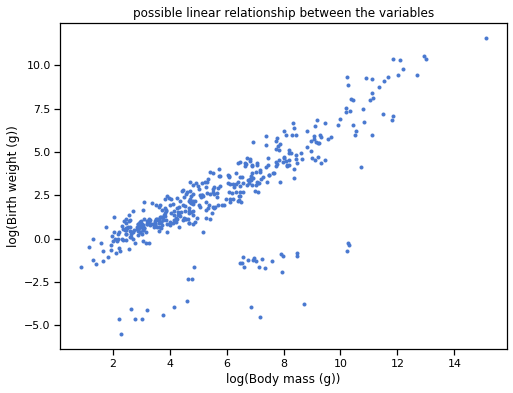

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x=bm_x_log,y=bw_y_log,marker='.')
plt.title('possible linear relationship between the variables')
plt.ylabel('log(Birth weight (g))')
plt.xlabel('log(Body mass (g))')
plt.show()

After applying a transformation for which there is a good correlation between the adult weight and the birth weight, create a linear model plot using Seaborn.

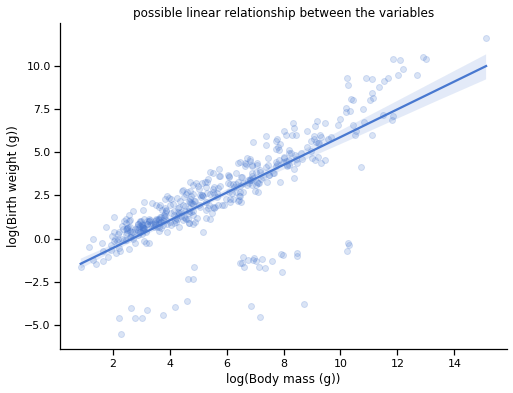

In [8]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x=bm_x_log, y=bw_y_log, scatter_kws={'alpha':0.2})
ax.set_title('possible linear relationship between the variables')
ax.set_ylabel('log(Birth weight (g))')
ax.set_xlabel('log(Body mass (g))')
sns.despine()

Now we should be satisfied that there is a linear relationship between the variables.

Please perform linear regression on the transformed data using `scipy.stats.linregress`.
Print the intercept and slope of the regression.

Note that if you used a different transformation you might get different values; that's OK as long as your results make sense.

In [9]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=bm_x_log,y=bw_y_log)
print("intercept: {:.3f}, slope: {:.3f}".format(intercept, slope))

intercept: -2.149, slope: 0.802


Note that `linregress` provides a p-value for the null hypothesis that the slope is 0.

Think: What does it mean if the null hypothesis is rejected? 

Decide if the null hypothesis can be rejected and print a statement that summarizes the result regarding adult weight and birth weight.

Don't forget to print the p-value to support your claim.

In [10]:
print('My p_value is equal to {:.2g}'.format(p_value))

My p_value is equal to 1.1e-88


My p-value almost ZERO.  
The P-value is a hypothesis test whose `null hypothesis is that the slope is zero`.  
This very very small p-value allows us to <b>reject this hypothesis</b>.  
And have a `high confidence` that the slope has this value (not due to randomness, nor by chance).    

With a slope of 0.8 it is clear that those features - Body mass (g),Birth weight (g) - has a `linear relationship`.   
And that <b>Body mass (g) has significant and positive effect on Birth weight (g)</b>.  

Finally, use the slope and intercept to predict the birth weight of offspring if the adult weight is 30kg (don't forget the transformation!).

In [11]:
offspring_bodymass = 30       #30kg=30000g
offspring_birthweigth = np.exp(intercept + slope*np.log(offspring_bodymass*1000))
# intercept, slope
print('If the adult body mass is {0} kg then the birth weight is {1} grams'.format(offspring_bodymass,offspring_birthweigth))

If the adult body mass is 30 kg then the birth weight is 452.49344340796404 grams


<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

# Exercise 2

In this exercise we will load COVID-19 case surveillance data and plot the number of cases in some countries.
The data is updated routinely by Imperial College London researchers: see [github repo](https://github.com/ImperialCollegeLondon/covid19model).

- **Download the file using Python's `urllib`** from <https://github.com/ImperialCollegeLondon/covid19model/raw/v1.0/data/COVID-19-up-to-date.csv>.
- **Load the data from the file using Pandas**
- **Convert the `dateRep` column to a timestamp** using `pd.to_datetime` and set the result to a new column `date`.

In [12]:
###
url = 'https://github.com/ImperialCollegeLondon/covid19model/raw/v1.0/data/COVID-19-up-to-date.csv'
fname = '../data/COVID-19-up-to-date.csv'

if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

df = pd.read_csv(fname,encoding='latin-1')
df['date'] = pd.to_datetime(df['dateRep'],format='%d/%m/%Y')
df.head()

Data file exists: True


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date
0,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0,2020-03-28
1,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0,2020-03-27
2,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0,2020-03-26
3,25/03/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0,2020-03-25
4,24/03/2020,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0,2020-03-24


**Plot the number of daily case (`cases` column)** for Israel and two other countries with similar population size (which is in the `popData2018` column).

Don't forget axis labels and legends.

In [13]:
# Note: I'm checking for errors in the dataset just in case...

# number of unique countries
n_countries = df.countriesAndTerritories.nunique()

# making sure all got one population value
n_pop_records = df[['popData2018','countriesAndTerritories']].drop_duplicates().shape[0]


print('asumtion in dataset population records is wrong' if n_countries != n_pop_records else 'Good. No errors. Keep going...')

Good. No errors. Keep going...


In [14]:
# now I can safly asume that each country has only only unique value for it's population
countries_by_pop = df[['popData2018','countriesAndTerritories']].drop_duplicates()

country = 'Israel'
n_countries = 2
country_pop = countries_by_pop[countries_by_pop['countriesAndTerritories']==country].popData2018.iloc[0]

countries_by_pop.popData2018 = np.abs(countries_by_pop.popData2018-country_pop)
contries = countries_by_pop.nsmallest(n=n_countries+1,columns='popData2018')
contries

,popData2018,countriesAndTerritories
3469,0.0,Israel
414,36763.0,Austria
5358,277484.0,Papua_New_Guinea


In [15]:
# choose those countries with cases & date
df_ccd = df[['countriesAndTerritories','cases','date']][df.countriesAndTerritories.isin(contries.countriesAndTerritories)]

# check the amount of records for each country
print(df_ccd['countriesAndTerritories'].value_counts(),'\n\n')

# due to the lack of records in the country of Papua_New_Guinea, I'll choose the next best one
contries = countries_by_pop[countries_by_pop.countriesAndTerritories != 'Papua_New_Guinea'].nsmallest(n=n_countries+1,columns='popData2018')

# same as before - choose those countries with cases & date
df_ccd = df[['countriesAndTerritories','cases','date']][df.countriesAndTerritories.isin(contries.countriesAndTerritories)]

# same as before - the amount of records for each country
print(df_ccd['countriesAndTerritories'].value_counts(),'\n\n')
print('GOOD!')

Austria             89
Israel              86
Papua_New_Guinea     8
Name: countriesAndTerritories, dtype: int64 


Austria        89
Switzerland    89
Israel         86
Name: countriesAndTerritories, dtype: int64 


GOOD!


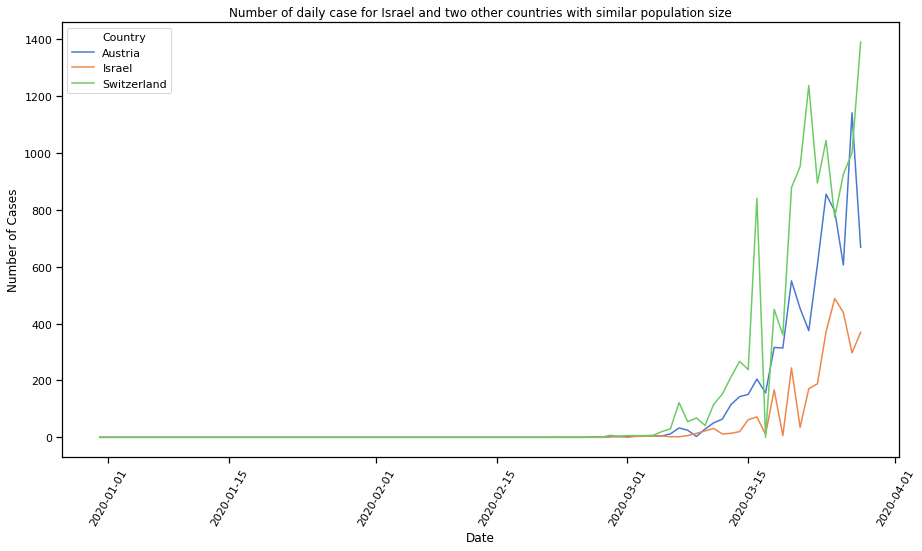

In [16]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_ccd,x='date',y='cases',hue='countriesAndTerritories')
ax.legend().texts[0].set_text('Country')
ax.set_title('Number of daily case for Israel and two other countries with similar population size')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=60)
plt.show()

**Plot the number of daily case (`cases` column)** for the five largest countries in the world.

Try not to use country names but instead write generic code that finds the specific countries automatically.

Since the number of cases differs markedly, consider using a log scale.

In [17]:
# following my generic code from before 

n_countries = 5
contries = countries_by_pop.nlargest(n=n_countries,columns='popData2018')
df_ccd = df[['countriesAndTerritories','cases','date']][df.countriesAndTerritories.isin(contries.countriesAndTerritories)]
df_ccd.head()

,countriesAndTerritories,cases,date
1405,China,134,2020-03-28
1406,China,111,2020-03-27
1407,China,121,2020-03-26
1408,China,99,2020-03-25
1409,China,99,2020-03-24


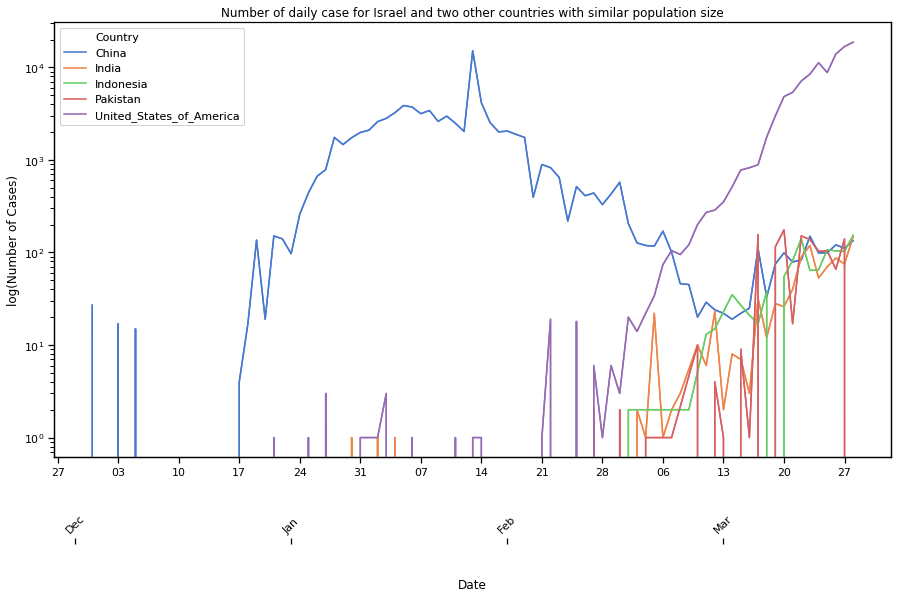

In [18]:
import matplotlib.dates as mdates

plt.figure(figsize=(15,8))

ax = plt.subplot(111)
sns.lineplot(data=df_ccd,x='date',y='cases',hue='countriesAndTerritories')

ax.set_title('Number of daily case for Israel and two other countries with similar population size')

ax.legend().texts[0].set_text('Country')
ax.set_ylabel('log(Number of Cases)')
ax.set_xlabel('')
ax.set_yscale('log')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

ax2 = ax.twiny()
sns.lineplot(data=df_ccd,x='date',y='cases',hue='countriesAndTerritories')
ax2.legend().texts[0].set_text('Country')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=25))
ax2.spines['top'].set_position(('axes', -0.2))
ax2.spines['top'].set_visible(False)
ax2.set_xlabel('Date')
ax2.xaxis.set_label_coords(0.5, -0.30)

plt.xticks(rotation=45)
plt.show()



**Plot a linear model of the log of the number of daily cases in USA over time**:

- Create a `datetime` object for a starting date: March 1st, 2020
- Keep only the rows for USA
- Remove rows with a date earlier than the starting date
- Create a new column `day` for the number of days since the start date: note that substracting `datetime` object creates a `timedetla` object that has a `days` attribute.
- Create a new column `log-cases` that has the log of the `cases` column
- Use Seaborn's `lmplot` to plot a linear model of `log-cases` vs `day`.

In [19]:
# 1
dt = datetime(2020, 3, 1)

# USA
df_usa = df_ccd[df_ccd.countriesAndTerritories=='United_States_of_America']

# earlier date 
df_usa = df_usa[dt <= df_usa.date]

# day column
df_usa['day'] = df_usa.date.apply(lambda d: (d-dt).days)

# log-cases column
df_usa['log_cases'] = np.log(df_usa.cases) # I could have removed the zeros before hand - but I preferred it like this


# taking only finite rows (relevant ones)  , 
df_usa = df_usa[np.isfinite(df_usa.log_cases)]

# print 
df_usa.head()

,countriesAndTerritories,cases,date,day,log_cases
7082,United_States_of_America,18695,2020-03-28,27,9.836011
7083,United_States_of_America,16797,2020-03-27,26,9.728956
7084,United_States_of_America,13963,2020-03-26,25,9.544166
7085,United_States_of_America,8789,2020-03-25,24,9.081256
7086,United_States_of_America,11236,2020-03-24,23,9.326878


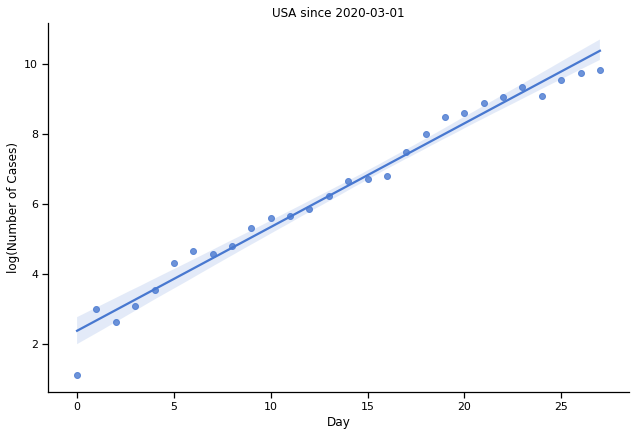

In [20]:
sns.lmplot(data=df_usa,y='log_cases',x='day',fit_reg=True,height=6,aspect=1.5,order=1, truncate=True)

ax = plt.gca()
ax.set_title('USA since ' + dt.strftime('%Y-%m-%d'))
ax.set_ylabel('log(Number of Cases)')
ax.set_xlabel('Day')
plt.show()

**End of assignment**